# Grupo 20 - Kick-Starter projects

### The Data
We will be using the dataset <em>ks-projects-201801.csv</em>. 

This dataset contains 378660 cases and 15 features, including:

- ID
- name
- category
- main_category
- currency
- deadline
- goal
- lauched
- pleged
- state
- backers
- country
- usd pledged
- usd_pledged_real
- usd_pledged_goal

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

We'll use the built in hotel bookings dataset from Scikit Learn. We can get with the load function:

In [2]:
data = pd.read_csv('ks-projects-201801.csv')
data_original = pd.read_csv('ks-projects-201801.csv')

In [3]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

## 1. Missing Values

<Axes: >

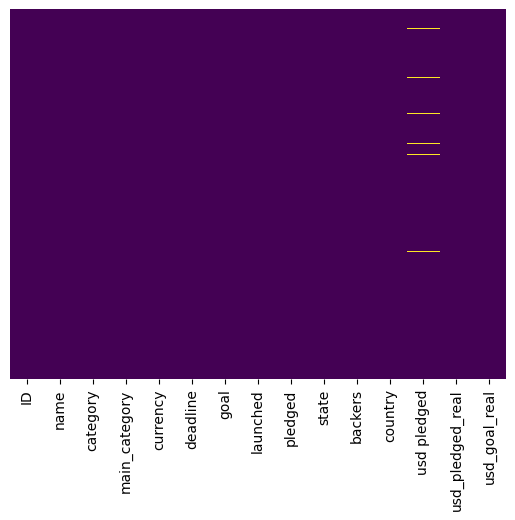

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

### - Drop or fill
Let's verify how the data is presented in the feature <em>affected_roads</em>

In [8]:
data = data_original.copy()
data.drop_duplicates()
# colunas com valores nulos ou que só tem 1 valor por linha
data.drop(['name','ID'],axis=1,inplace=True)
data = data[data['usd pledged'].notnull()]
# não faz sentido prever um estado intermédio de um projeto
data = data[(data['state'] != 'undefined') & (data['state'] != 'live') & (data['state'] !='suspended') & (data['state'] !='canceled')]
# 1970-01-01 01:00:00, data 0
data = data[data['launched'] != '1970-01-01 01:00:00']
# Valor não admissivel, embora seja real
data = data[data['country'] != 'N,0"']
# para facilitar o tratamento das datas
data['launched'] = pd.to_datetime(data['launched'], format='%Y-%m-%d %H:%M:%S')
data['deadline'] = pd.to_datetime(data['deadline'], format='%Y-%m-%d')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331465 entries, 0 to 378660
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          331465 non-null  object        
 1   main_category     331465 non-null  object        
 2   currency          331465 non-null  object        
 3   deadline          331465 non-null  datetime64[ns]
 4   goal              331465 non-null  float64       
 5   launched          331465 non-null  datetime64[ns]
 6   pledged           331465 non-null  float64       
 7   state             331465 non-null  object        
 8   backers           331465 non-null  int64         
 9   country           331465 non-null  object        
 10  usd pledged       331465 non-null  float64       
 11  usd_pledged_real  331465 non-null  float64       
 12  usd_goal_real     331465 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(5)
memory usa

Remove 326 465 entries. Final entries = 5 000

In [10]:
n    = 326465
data = data.drop(data.index[:n])

In [11]:
data.shape

(5000, 13)

In [12]:
# Converter categoricos para numéricos
replace_map = {'state': {'failed':0,'successful':1}}
data.replace(replace_map,inplace=True)

In [54]:
 def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

def grafico_setor(atr,data):
    labels = data[atr].astype('category').cat.categories.tolist()
    counts = data[atr].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()
    
def graficos_pontos(data):
    sns.pairplot(data)
    
def caixa_bigodes(data,x,y):
    plt.figure(figsize=(12,7))    
    sns.boxplot(x=x,y=y,data=data,palette='winter')

def matriz_correlacao(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(numeric_only=False),annot=True, fmt=".2f",linewidths=0.5)

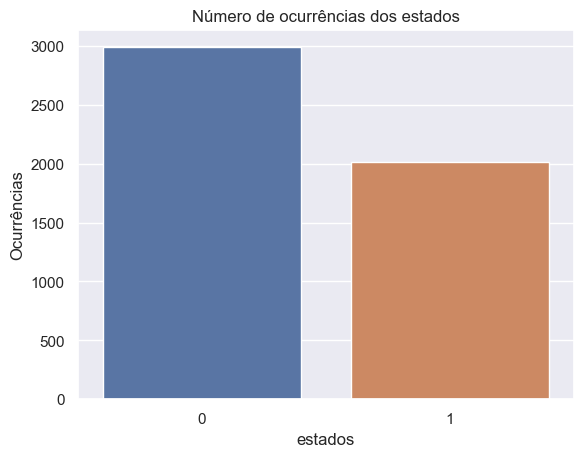

In [55]:
# histograma
grafico_barras(data,'state','Número de ocurrências dos estados','estados','Ocurrências')
# Podemos concluir que temos bastantes casos de falhados

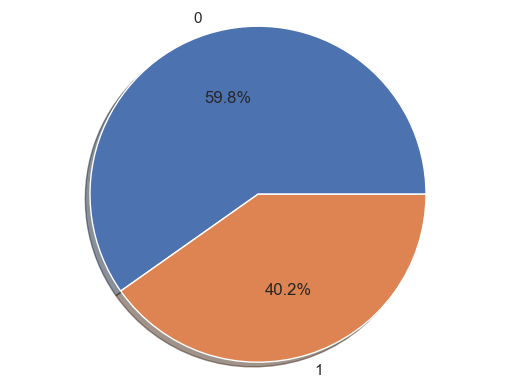

In [56]:
# Gráfico setor/circular
grafico_setor('state',data)
# 59.8% falhados, 40.2% sucessos

In [57]:
# grafico de pontos
# graficos_pontos(data)

In [58]:
data['country'].value_counts()

country
US    3980
GB     422
CA     191
AU     108
DE      47
FR      39
NL      33
IT      27
NZ      26
ES      23
MX      21
SE      14
IE      12
AT      11
DK      11
NO       9
CH       7
BE       7
HK       6
SG       6
Name: count, dtype: int64

In [59]:
country_continent = {'US' : 'NA', 'GB': 'EU', 'CA': 'NA', 'AU': 'OC', 'DE' : 'EU', 'FR': 'EU', 'NL': 'EU', 'IT': 'EU', 'NZ' : 'OC', 'ES': 'EU', 'MX' : 'NA', 'SE' : 'EU', 'IE' : 'EU', 'AT' : 'EU', 'DK': 'EU', 'NO': 'EU', 'CH':'AS', 'BE':'EU', 'HK': 'AS', 'SG': 'AS'}
data['continent'] = data['country'].map(country_continent)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country           5000 non-null   object        
 10  usd pledged       5000 non-null   float64       
 11  usd_pledged_real  5000 non-null   float64       
 12  usd_goal_real     5000 non-null   float64       
 13  continent         5000 non-null   object        
 14  days_launched     5000

In [60]:
data['main_category'].value_counts()

main_category
Film & Video    816
Music           719
Publishing      547
Technology      428
Art             425
Games           411
Design          351
Food            332
Fashion         306
Photography     156
Theater         149
Comics          142
Crafts          101
Journalism       66
Dance            51
Name: count, dtype: int64

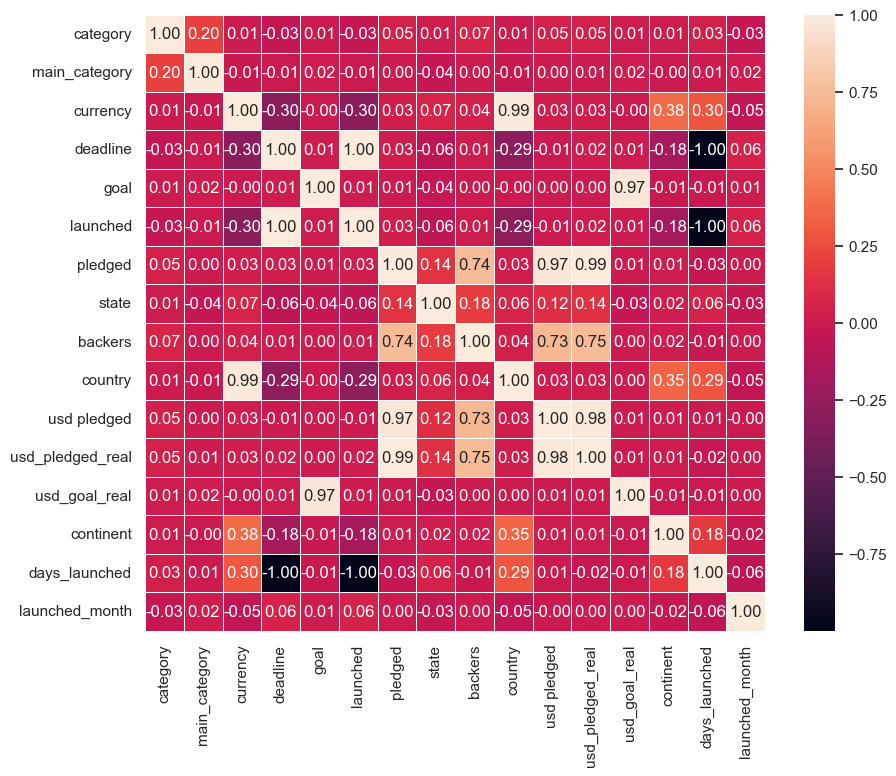

In [61]:
# correlação
from datetime import datetime
def converter(data,atr):
    data[atr]=data[atr].astype('category').cat.codes
    
data['days_launched'] = (datetime.today() - data['launched']).dt.days
data['launched_month'] = data['launched'].dt.month
data_copy = data.copy()
for atr in ['country','category','main_category','currency','continent']:
    converter(data_copy,atr)

    
matriz_correlacao(data_copy)

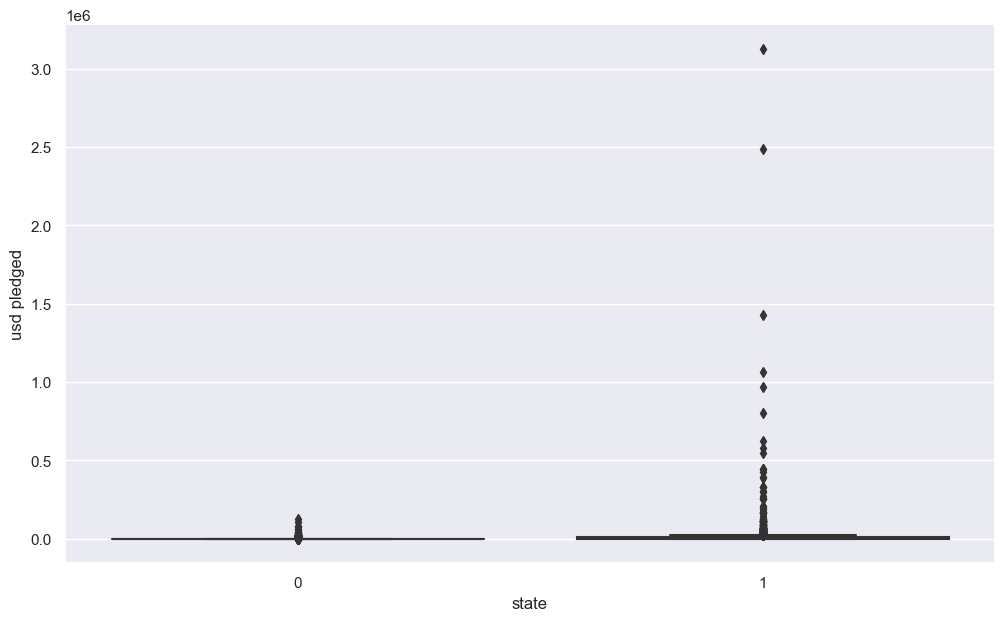

In [62]:
caixa_bigodes(data,'state','usd pledged')

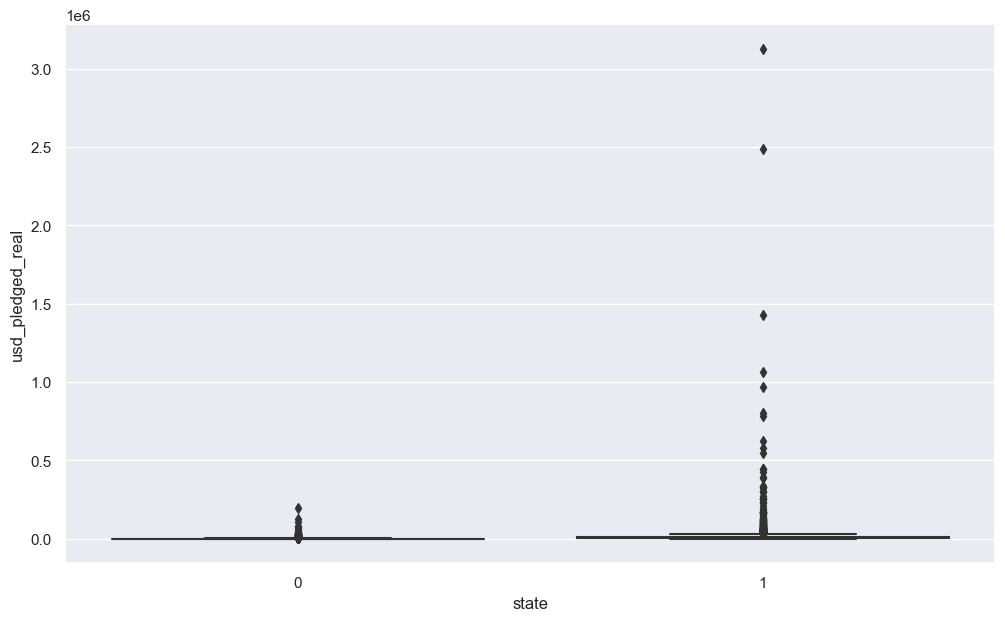

In [63]:
# caixa de bigodes currency -> state
caixa_bigodes(data,'state','usd_pledged_real')

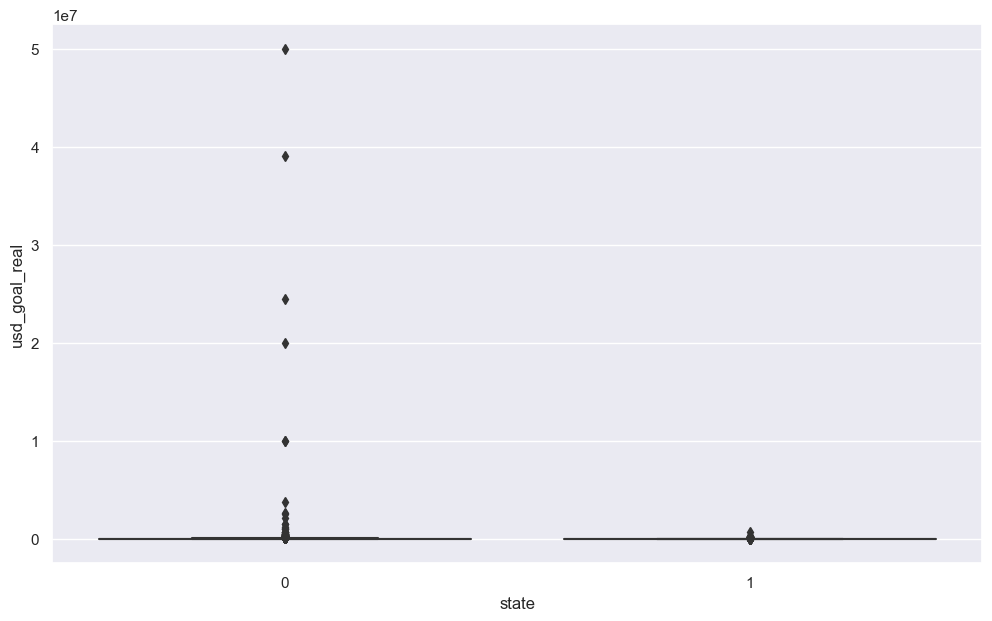

In [64]:
caixa_bigodes(data,'state','usd_goal_real')

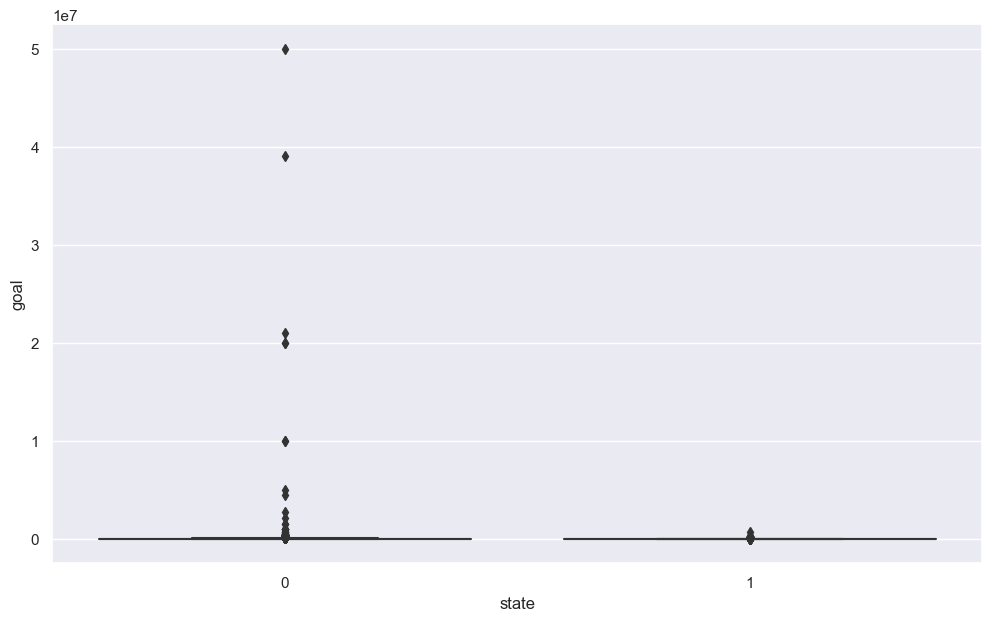

In [65]:
caixa_bigodes(data,'state','goal')

In [66]:
# percentagem sucesso e falhanço de cada main_category
category_state_counts = data.groupby(['main_category', 'state']).size().unstack(fill_value=0)
category_state_percentages = category_state_counts.div(category_state_counts.sum(axis=1), axis=0) * 100
total_count = len(data)
main_category_counts = data['main_category'].value_counts()
main_category_percentages = (main_category_counts / total_count) * 100
print(main_category_percentages)
# category_state_percentages['percentage'] = data['main_category'].map(main_category_percentages)

category_state_percentages = category_state_percentages.rename(columns={0: 'Failed', 1: 'Successful'})
print(category_state_percentages)
%store data

main_category
Film & Video    16.32
Music           14.38
Publishing      10.94
Technology       8.56
Art              8.50
Games            8.22
Design           7.02
Food             6.64
Fashion          6.12
Photography      3.12
Theater          2.98
Comics           2.84
Crafts           2.02
Journalism       1.32
Dance            1.02
Name: count, dtype: float64
state             Failed  Successful
main_category                       
Art            52.705882   47.294118
Comics         40.845070   59.154930
Crafts         82.178218   17.821782
Dance          41.176471   58.823529
Design         57.549858   42.450142
Fashion        72.875817   27.124183
Film & Video   62.009804   37.990196
Food           69.578313   30.421687
Games          51.094891   48.905109
Journalism     72.727273   27.272727
Music          46.036161   53.963839
Photography    64.743590   35.256410
Publishing     65.447898   34.552102
Technology     78.504673   21.495327
Theater        38.255034   61.744966

#### b) Fill with zero

#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

We will choose the factorize technique to keep going.

Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will factorize for now.

## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

We can extract parts of the date and create newm columns with that:

Since the year and the minute have only one value, we will drop it.

Other functions to deal with dates

We can use <em>datetime.today</em> and fetch the actual date.

It can be measured the time elapsed between the dates on the dataset and today.

And we can also separate each component of the date by day, month, hour, time, etc.

Now we need to choose how to deal with the <em>record_date</em>.

There are other features that need to be worked on, but it's up to you now!

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

Let's analyze through a heatmap

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

Jointplot <em>Luminosity vs. Avg_temperature</em>

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>

# Train Test Split

Split the data into a training set and a testing set.

# Train a Model

Now it's time to train a Decision Tree Classifier. 

**Call the DecisionTreeClassifier() model from sklearn and fit the model to the training data.**

#### 1. Plot the resultant tree (plot_tree) and save it as figure (.png)

#### 2. Using export_text to represent the tree. Save it in a log file

# Model Evaluation

Now let's get predictions from the model and create a confusion matrix and a classification report.

Let's see if we can tune the parameters to try to get even better. It is unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

- Finding the right parameters is a tricky task
- The idea of creating a 'grid' of parameters and trying out all the possible combinations is called a Gridsearch
    - This method is common enough that Scikit-learn has this functionality built in with GridSearchCV (CV stands for Cross-Validation)
    - GridSearchCV takes a dictionary that describes the parameters that should be tried and the model to train
    - The grid of parameters is defined as a dictionary where the keys are the parameters and the values are the settings to be tested

- GridSearchCV is a meta-estimator
- It takes an estimator like DTC and creates a new estimator that behaves exactly the same - in this case, like a classifier.
- You should add <em>refit=True</em> and choose verbose to whatever number you want (verbose means the text output describing the process).

What does fit do: 
- Runs the same loop with cross-validation to find the best parameter combination 
- Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation) to built a single new model using the best parameter setting

Now let's take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?

## Pruning

Pruning of the DT is done by replacing a whole subtree by a leaf node.
If the expected error rate in the subtree is greater thant the single leaf,  it is made the replacement.

When to apply in Decision Trees:
- If the node gets very small, do not continue to split
- Minimum error (cross-validation) pruning without early stopping is a good technique
- Build a full-depth tree and work backward by applying a statistical test during each stage
- Prune an interior node and raise the sub-tree beneath it up one level

#### Best Depth Tree

You can inspect the best parameters found by GridSearchCV in the **best_params_ attribute**, and the best estimator in the **best\_estimator_ attribute**:

#### 1. Plot the tree (dpi=1000)

#### 2. Evaluate the model with confusion matrix  and classification report

#### Pruned Tree

#### 1. Plot the tree

#### 2. Evaluate the model with confusion matrix  and classification report